# Effect of Attitude & Subjective Norms on Math Intention
## by fyasdani

## Investigation Overview

The purpose of my exploration is twofold: 1) to discover why the US underperforms at math, while its neighbor Canada excels—when the two countries are otherwise quite similar; and 2) to discover what the US can do to excel as well.

My goal here is to communicate my findings about the problems faced by the US and how they might be overcome.

## Dataset Overview

The PISA 2012 dataset includes 485,490 students and 635 features, of which 120 relate to math. They are spread across 14 categories—four of which were explored to varying degrees. Three features are of special interest here.

## Summary of Key Insights

- 10% of math-oriented, US high-school students have no intention of going to college for math, or of pursuing a career in it—whereas Canada's numbers hold steady.
  - Nationwide, that amounts to *millions* of students forsaking math.
  
- The average Canadian student is more math-focused than the average American one.
  - Yet a greater percentage of American students focus *fully* on math.
<br><br>
- The theory of reasoned action (TRA) elegantly explains why some American students intend to do math, and others do not.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
plt.style.use('seaborn')
sns.set_style('white')

In [5]:
blue = sns.color_palette()[0]
green = sns.color_palette()[1]
red = sns.color_palette()[2]

In [3]:
df_dict = pd.read_csv(
    'pisadict2012.csv',
    encoding='latin-1',
    names=['Dataset Column Name', 'Description'],
    skiprows=1
)

df_dict_math = df_dict.query('`Description`.str.contains("Math")')

# Selecting the columns to use—same as before.
cols = df_dict_math['Dataset Column Name']

# Add the countries column.
cols = pd.concat([cols, pd.Series(['CNT'])])

# load in the dataset into a pandas dataframe
df = pd.read_csv(
    'pisa2012.csv',
    encoding='latin-1',
    usecols=cols,
)

## America's Retention Problem

Bar charts are great for showing changes. This one shows how many math-oriented, US high-school students have no intention of going to college for math—or of pursuing a career in it. In the sample, there is a shortfall of 166 students, on the math side, going from high school to college. And the sample only includes 4978 students.

This comes out to 3.3%, which may seem small, but across America, there are 77 million high school students. Nationally, that amounts to a shortfall of 2.6 million math-related majors. At least science sees a commensurate increase.

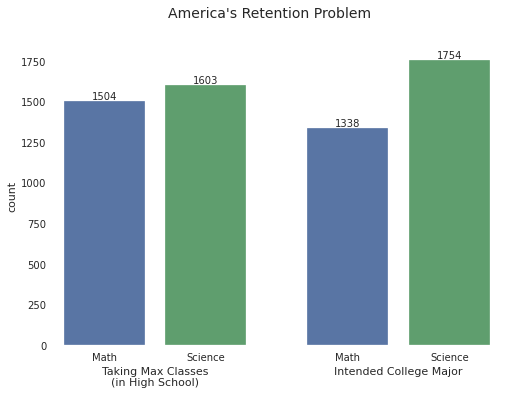

In [44]:
df_us = df.query('CNT == "United States of America"')
df_ca = df.query('CNT == "Canada"')

fig = plt.figure()
    
ax1 = fig.add_subplot(1, 2, 1)
g = sns.countplot(x=df_us.ST48Q04)
g.bar_label(g.containers[0])
g.set(xticklabels=['Math', 'Science'], xlabel='Taking Max Classes\n(in High School)')
ax2 = fig.add_subplot(1, 2, 2)
g = sns.countplot(x=df_us.ST48Q02)
g.bar_label(g.containers[0])
g.set(xticklabels=['Math', 'Science'], xlabel='Intended College Major')
ax1.set_ylim(ax2.get_ylim())
ax2.set_yticks([])
ax2.set_ylabel('')
fig.suptitle('America\'s Retention Problem', size=14);

## Distribution of Students by Intentions towards Math

Histograms are for looking at distributions of single variables, but placing two histograms side-by-side allows for comparison of variables. Both Canada and the US are multimodal, but there is a crucial difference. The highest peak for Canada is in the middle—about where you might expect it—whereas the highest peak for the United States is at the upper bound.

The average American student may be less math-focused than the average Canadian student, but a greater proportion of American students are fully focused on math (23% vs 18%).

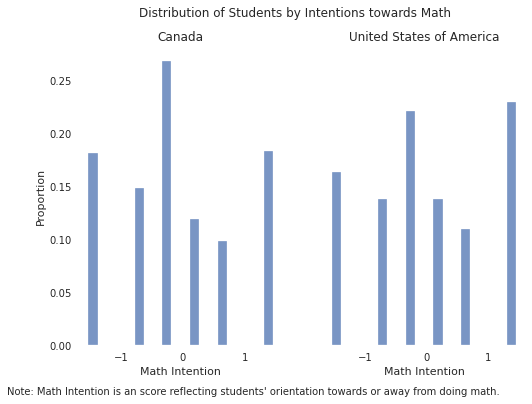

In [43]:
# dropping all the scores derived from any NaNs
df_us_intentions = df_us[['MATINTFC', 'ST48Q01', 'ST48Q02', 'ST48Q03',
                          'ST48Q04', 'ST48Q05',]].dropna()
df_ca_intentions = df_ca[['MATINTFC', 'ST48Q01', 'ST48Q02', 'ST48Q03',
                          'ST48Q04', 'ST48Q05',]].dropna()

def hist(ca_col, us_col, xlab):
    '''
    Plot two histplots to easily compare CA & US. Use the Freedman-Diaconis rule
    to calculate the number of bins.
    '''
    count, _, _, min_, q1, _, q3, max_ = ca_col.describe()
    bin_width = (2 * (q3 - q1)) / (count ** (1 / 3))
    bins_ca = int(np.ceil((max_ - min_) / bin_width))
    
    count, _, _, min_, q1, _, q3, max_ = us_col.describe()
    bin_width = (2 * (q3 - q1)) / (count ** (1 / 3))
    bins_us = int(np.ceil((max_ - min_) / bin_width))
    
    bins = np.mean([bins_ca, bins_us]).astype(int)
    
    fig = plt.figure()   

    ax1 = fig.add_subplot(1, 2, 1)
    sns.histplot(ca_col, stat='proportion', bins=bins)
    ax1.set_xlabel(xlab)
    plt.title('Canada')
    ax2 = fig.add_subplot(1, 2, 2)
    sns.histplot(us_col, stat='proportion', bins=bins)
    ax2.set_ylim(ax1.get_ylim())
    ax2.set_yticks([])
    ax2.set_ylabel('')
    ax2.set_xlabel(xlab)    
    plt.title('United States of America')

    fig.suptitle('Distribution of Students by Intentions towards Math')
    fig.text(0, 0, 'Note: Math Intention is an score reflecting students\'' 
                   ' orientation towards or away from doing math.');

hist(df_ca_intentions.MATINTFC, df_us_intentions.MATINTFC, 'Math Intention')

## Theory of Reasoned Action

According to the theory of reasoned action (TRA), one's intentions are the proximate cause of his or her actions. Per the TRA, two factors affect intentions: attitude* and subjective norms.

*The PISA data calls it Self-Concept.

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f9/Theory_of_reasoned_action.png" alt="Diagram showing simple causal chain from subjective norms through intentions on to behavior" width="640" height="380">

<span style="font-size:80%;">“Theory of reasoned action”, by Stevienicks22, licensed under <a href="https://creativecommons.org/licenses/by-sa/4.0/deed.en">CC BY 4.0</a></span>

## How Subjective Norms & Self-Concept Account for Math Intentions

Three quantitative variables? No problem! Just use a multivariate scatterplot with a color bar for the additional encoding. This plot readily that shows Self-Concept and Subjective Norms relate positively to Math Intention. The plot points in the upper-right quadrant tend to be blue—and those in the lower-left tend to be red. Also, note how the top half is bluer than the right half, which further demonstrates that Self-Concept affects Math Intention more.

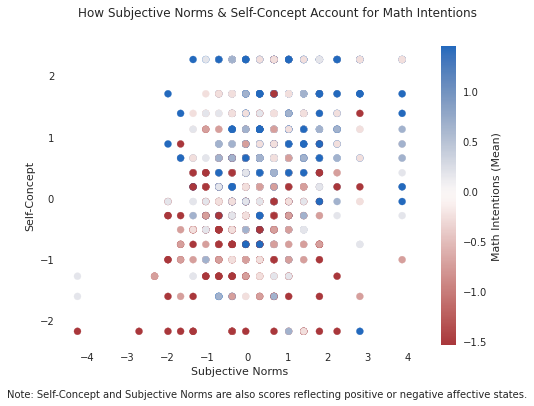

In [56]:
df_us_norms = df_us[['SUBNORM', 'ST35Q01', 'ST35Q02', 'ST35Q03', 'ST35Q04', 
                     'ST35Q05', 'ST35Q06',]].dropna()

df_us_concept = df_us[['SCMAT', 'ST42Q02', 'ST42Q04', 'ST42Q06', 'ST42Q07', 
                       'ST42Q09',]].dropna()

agg_dict = {
    'Math Intentions':df_us_intentions.MATINTFC,
    'Subjective Norms':df_us_norms.SUBNORM,
    'Self-Concept':df_us_concept.SCMAT,
}

df_us_inec_agg = pd.DataFrame(agg_dict).dropna()

plt.scatter(data=df_us_inec_agg, x='Subjective Norms', y='Self-Concept',
            c='Math Intentions', cmap='vlag_r')
plt.xlabel('Subjective Norms')
plt.ylabel('Self-Concept')
plt.suptitle('How Subjective Norms & Self-Concept Account for Math Intentions')
plt.colorbar(label='Math Intentions (Mean)')
plt.text(-6, -3.25, 'Note: Self-Concept and Subjective Norms are also scores'
                    ' reflecting positive or negative affective states.');

There you have it. If a person is encouraged by family & friends to do math, they probably will. And once they feel they're good at math, they'll like it even more: maybe even enough to stick with it through college and beyond.